### 💡 Sobre o Desafío 💡

Telecom X - Análise de Evasão de Clientes
Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

### Introdução 

No mercado altamente competitivo das telecomunicações, reter clientes se tornou tão importante quanto conquistá-los. O fenômeno da evasão de clientes, também conhecido como churn, representa um grande desafio para as empresas do setor, pois impacta diretamente na receita, na imagem da marca e na sustentabilidade do negócio.

Neste contexto, a análise de dados surge como uma ferramenta estratégica para compreender o comportamento dos clientes e antecipar possíveis cancelamentos de serviço. Através da exploração de dados históricos, é possível identificar padrões, relacionar variáveis críticas e construir modelos preditivos que auxiliem na tomada de decisões e no desenvolvimento de ações proativas de fidelização.

Este estudo tem como objetivo analisar o comportamento dos clientes de uma operadora de telecomunicações, com foco em prever a probabilidade de churn, utilizando técnicas de ciência de dados e aprendizado de máquina. Ao entender melhor os fatores que levam à saída dos clientes, a empresa poderá direcionar esforços de forma mais eficiente, reduzindo perdas e aumentando a satisfação do consumidor.

#### Resumo dos Pacotes Importados
pandas (pd): Manipulação e análise de dados em tabelas (DataFrames).

matplotlib.pyplot (plt): Criação de gráficos básicos (barras, linhas, dispersão).

seaborn (sns): Gráficos estatísticos mais bonitos e práticos.

numpy (np): Operações matemáticas e vetoriais.

plotly.express (px): Visualizações interativas e dinâmicas.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

###   Carregar os dados diretamente da API utilizando Python.

Após o carregamento do arquivo TelecomX_Data.json, os dados foram armazenados na variável dados, representando um DataFrame com informações dos clientes da empresa Telecom X.

In [62]:
# Nesta linha, utilizamos a biblioteca pandas para carregar um conjunto de dados no formato JSON

dados = pd.read_json('TelecomX_Data.json')


In [63]:
# visualização das 5 primeiras linhas (head())

dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


####  Consultar o dicionário para entender melhor os significados das variáveis.


In [64]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#### Explorar as colunas do dataset e verificar seus tipos de dados.

In [65]:
print(dados.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


#### Verificando Inconsistências nos Dados e valores ausentes:

In [66]:
# Verificar valores nulos no DataFreme

dados.isnull().sum()


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [67]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Limpeza e Tratamento de Dados: 

O processo começou com a importação do dataset em formato JSON usando pandas. Em seguida, foi feita uma análise exploratória inicial (head, info, verificação de nulos) para entender a estrutura. As colunas aninhadas do JSON (informações de cliente, telefone, internet e conta) foram “achatadas” com pd.json_normalize e depois combinadas num único DataFrame. Removemos linhas duplicadas e tratamos valores ausentes, substituindo nulos por zero. Na etapa de transformação, criamos a métrica Contas_Diárias (dividindo a cobrança mensal por 30) e convertimos variáveis categóricas “Yes/No” em 1 e 0 para facilitar futuras análises. Também padronizamos nomes de colunas para deixar o conjunto mais legível. Por fim, salvamos os dados tratados em CSV para uso posterior.

In [68]:
# Desaninhar as colunas que são dicionários

customer_dados = pd.json_normalize(dados['customer'])
phone_dados = pd.json_normalize(dados['phone'])
internet_dados = pd.json_normalize(dados['internet'])
account_dados = pd.json_normalize(dados['account'])

##### Verificando dados duplicados

In [69]:
# Concatenar tudo em um único DataFrame

Verificando_dados_duplicados = pd.concat([dados[['customerID', 'Churn']], customer_dados,
                               phone_dados, internet_dados, account_dados], axis=1)

In [70]:
# Concatenar tudo em um único DataFrame

Verificando_dados_duplicados.duplicated().sum()


np.int64(0)

In [71]:
# Varificando saidas nulas

Verificando_dados_duplicados.isnull().sum()


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [72]:
# Substituindo valores nulos

Verificando_dados_duplicados.fillna(0)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [73]:
# Varificando novamente de a valorees nulos 

dados.isnull().sum()[dados.isnull().sum() > 0]

Series([], dtype: int64)

#### Verificando tipos de dados

In [74]:
# Verificar tipos de dados

print(dados.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [75]:
# Descrição estatística 

Verificando_dados_duplicados.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [76]:
# passando dados normalizados do DataFreme para (dados)

dados = Verificando_dados_duplicados

In [77]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [78]:
# Salvando DataFrame Normalizado

dados.to_csv('dados_normalizados.csv', index=False) 

#### Faturamento mensal, valor diário

In [79]:
#  Criar a coluna 'Contas_Diarias' e calculando valor diario 

dados['Contas_Diarias'] = dados['Charges.Monthly'] / 30

In [80]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#### Padronização e Transformação de Dados (Opcional)
##### Converter valores textuais como "Sim" e "Não" em valores (1 e 0)

In [81]:
# Converter 'Yes' e 'No' em 1 e 0

conversao = {'Yes': 1, 'No': 0}

In [82]:
# Aplicar a conversão em colunas - 'Yes' e 'No' em 1 e 0

colunas_para_conversao = ['Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'MultipleLines', 'StreamingMovies']

for coluna in colunas_para_conversao:
    dados[coluna] = dados[coluna].map(conversao)

In [83]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


####  Traduzir colunas dos dados para tornar mais acessíveis

In [84]:

novo_nome_colunas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Conjuge',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Tempo_De_Contrato_Meses',
    'PhoneService': 'Servico_Telefonico',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Papel',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total',
}

In [85]:
# Aplicar a renomeação

dados.rename(columns=novo_nome_colunas, inplace=True)

In [86]:
dados

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_De_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Female,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Male,0,1,0,22,1,1.0,Fiber optic,...,0.0,0.0,0.0,1.0,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Male,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Male,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Two year,0,Mailed check,67.85,4627.65,2.261667


In [87]:
# Remoção de espaços em branco (limpeza)

dados['Genero'] = dados['Genero'].str.strip()
dados['Tipo_Contrato'] = dados['Tipo_Contrato'].str.strip()
dados['Metodo_Pagamento'] = dados['Metodo_Pagamento'].str.strip()
dados['Tipo_Internet'] = dados['Tipo_Internet'].str.strip()
# Tradução de valores para o português

# Gênero
dados['Genero'] = dados['Genero'].replace({
    'Male': 'Masculino',
    'Female': 'Feminino'
})

# Tipo de contrato
dados['Tipo_Contrato'] = dados['Tipo_Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual (1 ano)',
    'Two year': 'Bienal (2 anos)'
})


# Método de pagamento
dados['Metodo_Pagamento'] = dados['Metodo_Pagamento'].replace({
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque enviado por correio',
    'Bank transfer (automatic)': 'Débito automático em conta',
    'Credit card (automatic)': 'Cartão de crédito automático'
})

# Tipo de internet
dados['Tipo_Internet'] = dados['Tipo_Internet'].replace({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sem Internet'
})


dados

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_De_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,Feminino,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual (1 ano),1,Cheque enviado por correio,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensal,0,Cheque enviado por correio,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Masculino,0,0,0,4,1,0.0,Fibra óptica,...,1.0,0.0,0.0,0.0,Mensal,1,Cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Masculino,1,1,0,13,1,0.0,Fibra óptica,...,1.0,0.0,1.0,1.0,Mensal,1,Cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Feminino,1,1,0,3,1,0.0,Fibra óptica,...,0.0,1.0,1.0,0.0,Mensal,1,Cheque enviado por correio,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Feminino,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,Anual (1 ano),0,Cheque enviado por correio,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Masculino,0,1,0,22,1,1.0,Fibra óptica,...,0.0,0.0,0.0,1.0,Mensal,1,Cheque eletrônico,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Masculino,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Mensal,1,Cheque enviado por correio,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Masculino,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Bienal (2 anos),0,Cheque enviado por correio,67.85,4627.65,2.261667


In [88]:
# Checando valores nulos
dados.isnull().sum()

ID_Cliente                    0
Evasao                      224
Genero                        0
Idoso                         0
Possui_Conjuge                0
Possui_Dependentes            0
Tempo_De_Contrato_Meses       0
Servico_Telefonico            0
Multiplas_Linhas            707
Tipo_Internet                 0
Seguranca_Online              0
Backup_Online                 0
Protecao_Dispositivo       1581
Suporte_Tecnico            1581
Streaming_TV               1581
Streaming_Filmes           1581
Tipo_Contrato                 0
Fatura_Papel                  0
Metodo_Pagamento              0
Cobranca_Mensal               0
Cobranca_Total                0
Contas_Diarias                0
dtype: int64

In [89]:
# Substitui todos os NaN por 0
dados = dados.fillna(0)

In [90]:
# Checando valores nulos
dados.isnull().sum()

ID_Cliente                 0
Evasao                     0
Genero                     0
Idoso                      0
Possui_Conjuge             0
Possui_Dependentes         0
Tempo_De_Contrato_Meses    0
Servico_Telefonico         0
Multiplas_Linhas           0
Tipo_Internet              0
Seguranca_Online           0
Backup_Online              0
Protecao_Dispositivo       0
Suporte_Tecnico            0
Streaming_TV               0
Streaming_Filmes           0
Tipo_Contrato              0
Fatura_Papel               0
Metodo_Pagamento           0
Cobranca_Mensal            0
Cobranca_Total             0
Contas_Diarias             0
dtype: int64

In [91]:
dados

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_De_Contrato_Meses,Servico_Telefonico,Multiplas_Linhas,Tipo_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total,Contas_Diarias
0,0002-ORFBO,0.0,Feminino,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual (1 ano),1,Cheque enviado por correio,65.60,593.3,2.186667
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensal,0,Cheque enviado por correio,59.90,542.4,1.996667
2,0004-TLHLJ,1.0,Masculino,0,0,0,4,1,0.0,Fibra óptica,...,1.0,0.0,0.0,0.0,Mensal,1,Cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,1.0,Masculino,1,1,0,13,1,0.0,Fibra óptica,...,1.0,0.0,1.0,1.0,Mensal,1,Cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,1.0,Feminino,1,1,0,3,1,0.0,Fibra óptica,...,0.0,1.0,1.0,0.0,Mensal,1,Cheque enviado por correio,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0.0,Feminino,0,0,0,13,1,0.0,DSL,...,0.0,1.0,0.0,0.0,Anual (1 ano),0,Cheque enviado por correio,55.15,742.9,1.838333
7263,9992-RRAMN,1.0,Masculino,0,1,0,22,1,1.0,Fibra óptica,...,0.0,0.0,0.0,1.0,Mensal,1,Cheque eletrônico,85.10,1873.7,2.836667
7264,9992-UJOEL,0.0,Masculino,0,0,0,2,1,0.0,DSL,...,0.0,0.0,0.0,0.0,Mensal,1,Cheque enviado por correio,50.30,92.75,1.676667
7265,9993-LHIEB,0.0,Masculino,0,1,1,67,1,0.0,DSL,...,1.0,1.0,0.0,1.0,Bienal (2 anos),0,Cheque enviado por correio,67.85,4627.65,2.261667


#### calculando métricas como média, mediana, desvio padrão distribuição e comportamento dos clientes

In [92]:
# Estatísticas descritivas
estatisticas = dados.describe().T
estatisticas

,count,mean,std,min,25%,50%,75%,max
Evasao,7267.0,0.257190,0.437115,0.000000,0.000000,0.000000,1.000000,1.000000
Idoso,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
Possui_Conjuge,7267.0,0.484106,0.499782,0.000000,0.000000,0.000000,1.000000,1.000000
Possui_Dependentes,7267.0,0.300124,0.458343,0.000000,0.000000,0.000000,1.000000,1.000000
Tempo_De_Contrato_Meses,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
Servico_Telefonico,7267.0,0.902711,0.296371,0.000000,1.000000,1.000000,1.000000,1.000000
Multiplas_Linhas,7267.0,0.421770,0.493876,0.000000,0.000000,0.000000,1.000000,1.000000
Protecao_Dispositivo,7267.0,0.342782,0.474672,0.000000,0.000000,0.000000,1.000000,1.000000
Suporte_Tecnico,7267.0,0.289528,0.453575,0.000000,0.000000,0.000000,1.000000,1.000000
Streaming_TV,7267.0,0.383927,0.486374,0.000000,0.000000,0.000000,1.000000,1.000000


# Visualizações

- Um gráfico de pizza foi criado para mostrar a proporção geral de clientes ativos e inativos.

- Gráficos de barras compararam variáveis como gênero, tipo de contrato e tipo de internet em relação à evasão.

### Análise Exploratória de Dados

- A análise exploratória teve como objetivo identificar padrões e relações entre variáveis associadas à evasão de clientes (churn). Foram utilizados métodos estatísticos e gráficos para extrair informações relevantes do conjunto de dados tratado.

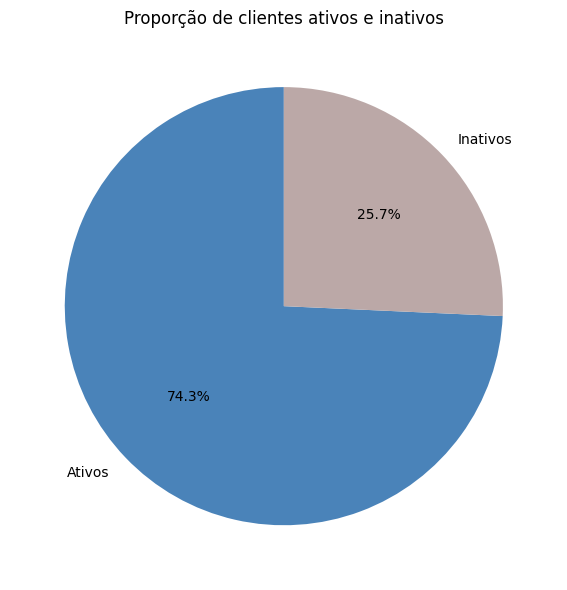

In [93]:
# Contagem de evasão
contagem = dados["Evasao"].value_counts().sort_index()
labels = ["Ativos", "Inativos"]
cores = ["#4A83B9", "#BBA8A7"]

plt.figure(figsize=(6, 6))
plt.pie(contagem, labels=labels, autopct="%1.1f%%",
        startangle=90, colors=cores)
plt.title("Proporção de clientes ativos e inativos")
plt.tight_layout()
plt.show()

In [94]:
dados_plot = dados.copy()
dados_plot['Evasao_legenda'] = dados_plot['Evasao'].replace(
    {0: 'Ativo', 1: 'Inativo'})

dados_plot['Evasao_legenda']

0         Ativo
1         Ativo
2       Inativo
3       Inativo
4       Inativo
         ...   
7262      Ativo
7263    Inativo
7264      Ativo
7265      Ativo
7266      Ativo
Name: Evasao_legenda, Length: 7267, dtype: object

### Perfil dos Clientes
- Gênero: A distribuição entre clientes masculinos e femininos foi comparada com a taxa de evasão.

- Um gráfico de barras (countplot com seaborn) foi usado para visualizar a proporção de evasão por gênero.

Evasao_legenda  Ativo  Inativo
Genero                        
Feminino         2653      939
Masculino        2745      930
Evasao_legenda  Ativo  Inativo
Genero                        
Feminino        73.86    26.14
Masculino       74.69    25.31


Text(0, 0.5, 'Contagem')

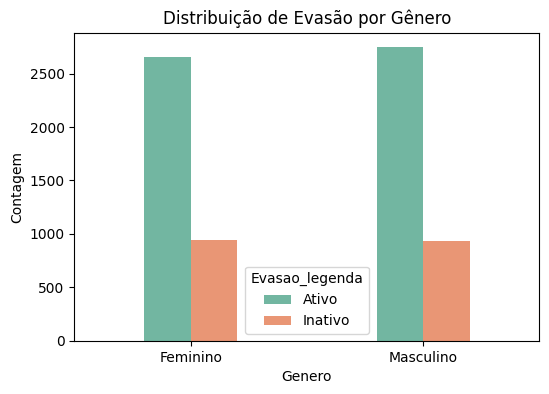

In [95]:
tabela_freq = pd.crosstab(dados_plot['Genero'], dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Genero'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Genero',
              hue='Evasao_legenda', palette='Set2', width=0.4, )

plt.title('Distribuição de Evasão por Gênero')
plt.ylabel('Contagem')

### Tipo de Contrato

- A evasão foi analisada com base nos diferentes tipos de contrato: Mensal e Anual.

- Foram utilizadas tabelas de frequência e proporção para comparar a distribuição entre clientes ativos e inativos em cada categoria.

- Um gráfico de barras (countplot com Seaborn) foi utilizado para visualizar de forma clara a distribuição da evasão por tipo de contrato, evidenciando que contratos mensais concentram a maior parte dos cancelamentos.

Evasao_legenda   Ativo  Inativo
Tipo_Contrato                  
Anual (1 ano)     1353      166
Bienal (2 anos)   1695       48
Mensal            2350     1655
Evasao_legenda   Ativo  Inativo
Tipo_Contrato                  
Anual (1 ano)    89.07    10.93
Bienal (2 anos)  97.25     2.75
Mensal           58.68    41.32


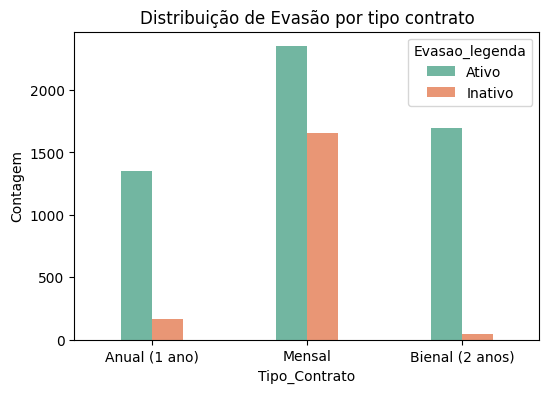

In [96]:
tabela_freq = pd.crosstab(
    dados_plot['Tipo_Contrato'], dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Tipo_Contrato'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))
# Cria coluna auxiliar com rótulos desejados



plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Tipo_Contrato',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por tipo contrato')
plt.ylabel('Contagem')
plt.show()

### Tipo de Internet

- Analisou-se também a influência do tipo de internet (DSL, Fibra Óptica ou Sem Internet) na evasão.

- A análise evidenciou que clientes com fibra óptica tendem a evadir mais do que os sem internet.


Evasao_legenda  Ativo  Inativo
Tipo_Internet                 
DSL              2029      459
Fibra óptica     1901     1297
Sem Internet     1468      113
Evasao_legenda  Ativo  Inativo
Tipo_Internet                 
DSL             81.55    18.45
Fibra óptica    59.44    40.56
Sem Internet    92.85     7.15


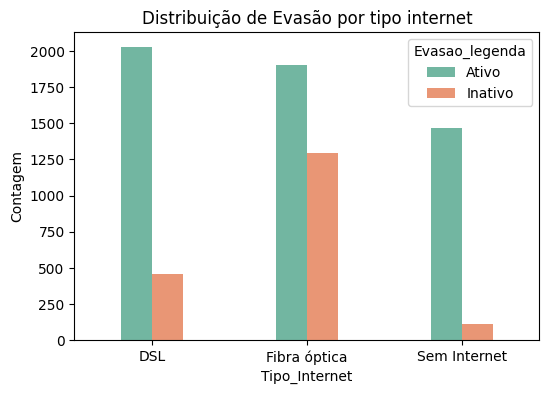

In [97]:
tabela_freq = pd.crosstab(
    dados_plot['Tipo_Internet'], dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Tipo_Internet'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Tipo_Internet',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por tipo internet')
plt.ylabel('Contagem')
plt.show()

 ### Método de Pagamento

- A taxa de evasão foi analisada conforme o método de pagamento utilizado pelos clientes: Cheque eletrônico, Cartão de crédito automático, Débito automático em conta e Cheque enviado por correio.

- Tabelas de frequência e proporção permitiram observar quais métodos estão mais associados à evasão.

- Um gráfico de barras (countplot com Seaborn) foi utilizado para mostrar a distribuição da evasão por método de pagamento, destacando possíveis padrões que indicam maior risco de cancelamento em certas formas de pagamento.

Evasao_legenda  Ativo  Inativo
Tipo_Internet                 
DSL              2029      459
Fibra óptica     1901     1297
Sem Internet     1468      113
Evasao_legenda                Ativo  Inativo
Metodo_Pagamento                            
Cartão de crédito automático  85.20    14.80
Cheque eletrônico             56.20    43.80
Cheque enviado por correio    81.50    18.50
Débito automático em conta    83.76    16.24


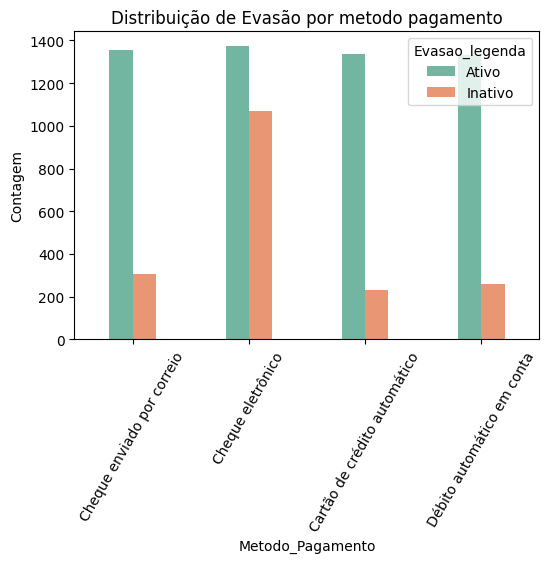

In [98]:
Evasao = pd.crosstab(dados_plot['Metodo_Pagamento'],
                     dados_plot['Metodo_Pagamento'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Metodo_Pagamento'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Metodo_Pagamento',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por metodo pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=60)
plt.show()

In [99]:
dados_plot['Idoso_legenda'] = dados_plot['Idoso'].replace(
    {0: 'Não Idoso', 1: 'Idoso'})

dados_plot['Idoso_legenda']

0       Não Idoso
1       Não Idoso
2       Não Idoso
3           Idoso
4           Idoso
          ...    
7262    Não Idoso
7263    Não Idoso
7264    Não Idoso
7265    Não Idoso
7266    Não Idoso
Name: Idoso_legenda, Length: 7267, dtype: object

### Faixa Etária (Idosos x Não Idosos)

- A análise comparou a taxa de evasão entre clientes idosos e não idosos, utilizando uma coluna categórica (Idoso_legenda) para facilitar a interpretação.

- Foram geradas tabelas de frequência e proporção para entender a distribuição da evasão em cada grupo.

- Um gráfico de barras (countplot com Seaborn) foi utilizado para mostrar visualmente a distribuição da evasão por faixa etária, possibilitando avaliar se a idade influencia o comportamento de cancelamento.

Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso             706      476
Não Idoso        4692     1393
Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso           59.73    40.27
Não Idoso       77.11    22.89


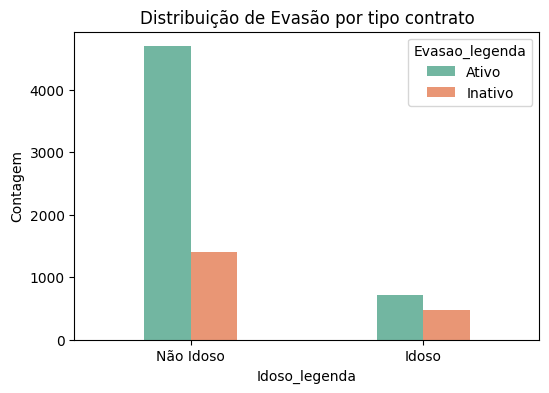

In [ ]:
tabela_freq = pd.crosstab(
    dados_plot['Idoso_legenda'], dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Idoso_legenda'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Idoso_legenda',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por tipo contrato')
plt.ylabel('Contagem')
plt.show()

### Forma de Pagamento

- A evasão foi analisada de acordo com a forma de pagamento dos clientes, como cartão de crédito automático, cheque eletrônico, débito automático em conta e cheque enviado por correio.

- Tabelas de frequência e proporção permitiram identificar quais métodos estão mais associados à permanência ou cancelamento.

- Um gráfico de barras (countplot com Seaborn) foi utilizado para visualizar a distribuição da evasão por forma de pagamento, revelando padrões que podem indicar maior risco de evasão em certos métodos, como o cheque eletrônico.

Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso             706      476
Não Idoso        4692     1393
Evasao_legenda                Ativo  Inativo
Metodo_Pagamento                            
Cartão de crédito automático  85.20    14.80
Cheque eletrônico             56.20    43.80
Cheque enviado por correio    81.50    18.50
Débito automático em conta    83.76    16.24


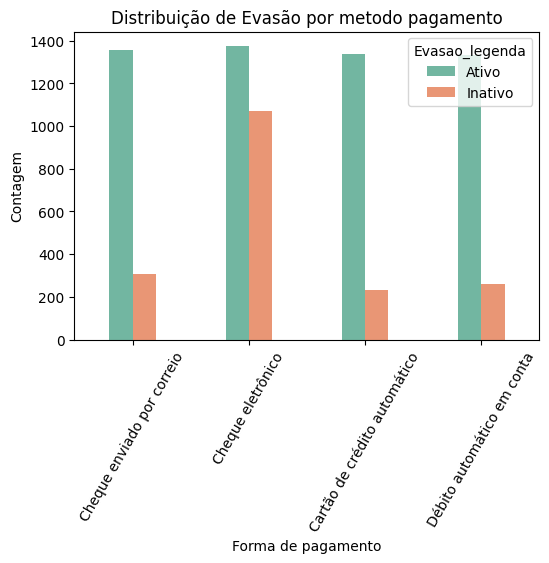

In [101]:
Evasao = pd.crosstab(dados_plot['Metodo_Pagamento'],
                     dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Metodo_Pagamento'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Metodo_Pagamento',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por metodo pagamento')
plt.ylabel('Contagem')
plt.xlabel('Forma de pagamento')
plt.xticks(rotation=60)
plt.show()

In [102]:
dados_plot['Possui_Conjuge_legenda'] = dados_plot['Possui_Conjuge'].replace(
    {0: 'Solteiro(a)', 1: 'Casado(a)'})

dados_plot['Possui_Conjuge_legenda']

0         Casado(a)
1       Solteiro(a)
2       Solteiro(a)
3         Casado(a)
4         Casado(a)
           ...     
7262    Solteiro(a)
7263      Casado(a)
7264    Solteiro(a)
7265      Casado(a)
7266      Casado(a)
Name: Possui_Conjuge_legenda, Length: 7267, dtype: object

### Estado Civil (Possui Cônjuge)

- A evasão foi analisada com base na variável Possui_Conjuge_legenda, que indica se o cliente declarou ter cônjuge ou não.

- Foram utilizadas tabelas de frequência e proporção para verificar a relação entre o estado civil e a evasão.

- Um gráfico de barras (countplot com Seaborn) foi criado para visualizar a distribuição da evasão entre clientes com e sem cônjuge, permitindo observar se o estado civil influencia na permanência ou cancelamento dos serviços.

Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso             706      476
Não Idoso        4692     1393
Evasao_legenda          Ativo  Inativo
Possui_Conjuge_legenda                
Casado(a)               80.98    19.02
Solteiro(a)             67.99    32.01


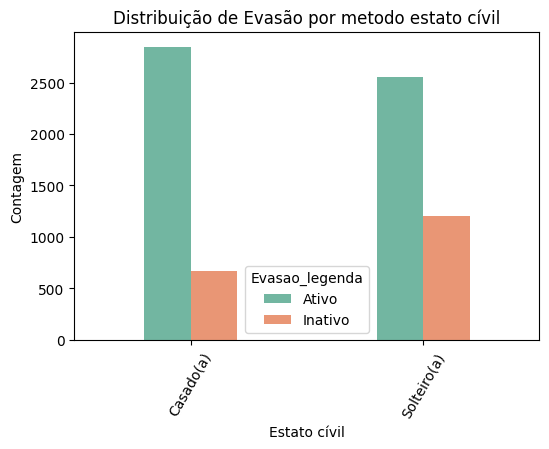

In [ ]:
Evasao = pd.crosstab(dados_plot['Possui_Conjuge_legenda'],
                     dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Possui_Conjuge_legenda'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Possui_Conjuge_legenda',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por metodo estato cívil')
plt.ylabel('Contagem')
plt.xlabel('Estato cívil')
plt.xticks(rotation=60)
plt.show()

In [104]:
dados_plot['Streaming_TV_leganda'] = dados_plot['Streaming_TV'].replace(
    {0: 'Não possui', 1: 'possui'})

dados_plot['Streaming_TV_leganda']

0           possui
1       Não possui
2       Não possui
3           possui
4           possui
           ...    
7262    Não possui
7263    Não possui
7264    Não possui
7265    Não possui
7266        possui
Name: Streaming_TV_leganda, Length: 7267, dtype: object

### Perfil dos Clientes

- Streaming TV: A relação entre o uso do serviço de "Streaming TV" e a taxa de evasão foi analisada.

- Foi criada uma tabela de frequência cruzada para comparar as categorias de streaming com os status de evasão.

- Um gráfico de barras (countplot com seaborn) foi utilizado para visualizar a distribuição da evasão conforme o serviço de "Streaming TV", facilitando a comparação visual das proporções entre os grupos.

Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso             706      476
Não Idoso        4692     1393
Evasao_legenda        Ativo  Inativo
Streaming_TV_leganda                
Não possui            76.44    23.56
possui                70.82    29.18


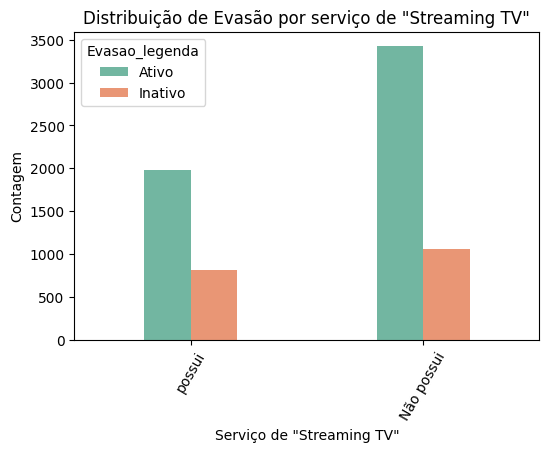

In [ ]:
Evasao = pd.crosstab(dados_plot['Streaming_TV_leganda'],
                     dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Streaming_TV_leganda'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Streaming_TV_leganda',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por serviço de "Streaming TV"')
plt.ylabel('Contagem')
plt.xlabel('Serviço de "Streaming TV"')
plt.xticks(rotation=60)
plt.show()

In [106]:
dados_plot['Streaming_Filmes_leganda'] = dados_plot['Streaming_Filmes'].replace(
    {0: 'Não possui', 1: 'possui'})

dados_plot['Streaming_Filmes_leganda']

0       Não possui
1           possui
2       Não possui
3           possui
4       Não possui
           ...    
7262    Não possui
7263        possui
7264    Não possui
7265        possui
7266        possui
Name: Streaming_Filmes_leganda, Length: 7267, dtype: object

### Perfil dos Clientes

- Streaming Filme: Foi avaliada a relação entre o uso do serviço de "Streaming filme" e a taxa de evasão dos clientes.

- Uma tabela de frequência cruzada mostrou a distribuição da evasão entre os diferentes grupos de usuários de streaming de filmes.

- Um gráfico de barras (countplot) visualizou a proporção de evasão conforme o uso do serviço, facilitando a comparação entre as categorias.

Evasao_legenda  Ativo  Inativo
Idoso_legenda                 
Idoso             706      476
Não Idoso        4692     1393
Evasao_legenda            Ativo  Inativo
Streaming_Filmes_leganda                
Não possui                76.39    23.61
possui                    70.95    29.05


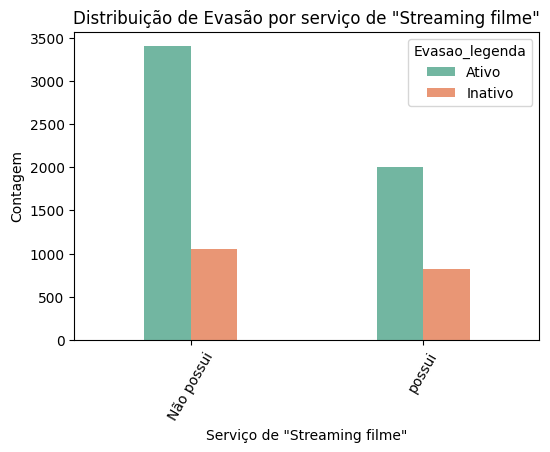

In [ ]:
Evasao = pd.crosstab(dados_plot['Streaming_Filmes_leganda'],
                     dados_plot['Evasao_legenda'])
print(tabela_freq)

tabela_prop = pd.crosstab(
    dados_plot['Streaming_Filmes_leganda'], dados_plot['Evasao_legenda'], normalize='index') * 100
print(tabela_prop.round(2))

plt.figure(figsize=(6, 4))
sns.countplot(data=dados_plot, x='Streaming_Filmes_leganda',
              hue='Evasao_legenda', palette='Set2', width=0.4)
plt.title('Distribuição de Evasão por serviço de "Streaming filme"')
plt.ylabel('Contagem')
plt.xlabel('Serviço de "Streaming filme"')
plt.xticks(rotation=60)
plt.show()

## Contagem de Evasão por Variáveis Numéricas

In [108]:
tabela_cruzada = pd.crosstab(
    dados['Tempo_De_Contrato_Meses'],
    dados['Evasao'],
    margins=True,
    margins_name='Total'
)

print(tabela_cruzada)

Evasao                    0.0   1.0  Total
Tempo_De_Contrato_Meses                   
0                          11     0     11
1                         254   380    634
2                         123   123    246
3                         113    94    207
4                         102    83    185
...                       ...   ...    ...
69                         92     8    100
70                        111    11    122
71                        170     6    176
72                        363     6    369
Total                    5398  1869   7267

[74 rows x 3 columns]


### Estatísticas Descritivas
Foram aplicadas funções como describe() e value_counts() para analisar a distribuição de variáveis numéricas e categóricas, como tempo de contrato, cobrança mensal e tipo de internet. Isso ajudou a obter uma visão geral dos dados e suas características principais.

### Perfil dos Clientes

- Faixa de Tempo de Contrato: Os clientes foram agrupados em faixas de tempo de contrato em meses para analisar a relação com a evasão.

- Foi criada uma tabela de frequência cruzada para mostrar a quantidade de clientes evadidos e não evadidos em cada faixa de contrato.

- Um gráfico de barras (barplot com seaborn) ilustrou a distribuição da evasão em cada faixa, facilitando a visualização da tendência da evasão conforme o tempo de contrato.



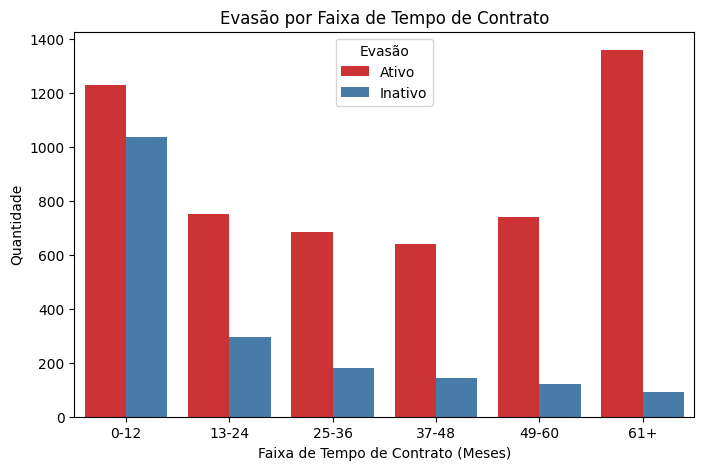

In [ ]:

ins = [0, 12, 24, 36, 48, 60, dados['Tempo_De_Contrato_Meses'].max()]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']


dados_plot['Faixa_Tempo_Contrato'] = pd.cut(
    dados_plot['Tempo_De_Contrato_Meses'],
    bins=ins,
    labels=labels,
    right=True,
    include_lowest=True
)


tabela = pd.crosstab(
    dados_plot['Faixa_Tempo_Contrato'],
    dados_plot['Evasao_legenda']
)


tabela = tabela.reset_index().melt(
    id_vars='Faixa_Tempo_Contrato',
    var_name='Evasao_legenda',
    value_name='Quantidade'
)


plt.figure(figsize=(8, 5))
sns.barplot(
    data=tabela,
    x='Faixa_Tempo_Contrato',
    y='Quantidade',
    hue='Evasao_legenda',
    palette='Set1'
)
plt.title('Evasão por Faixa de Tempo de Contrato')
plt.xlabel('Faixa de Tempo de Contrato (Meses)')
plt.ylabel('Quantidade')
plt.legend(title='Evasão')
plt.show()

In [110]:
media_cobranca = dados.groupby('Evasao')['Cobranca_Mensal'].mean()
print(media_cobranca)

Evasao
0.0    61.354224
1.0    74.441332
Name: Cobranca_Mensal, dtype: float64


In [111]:
max_cobranca = dados['Cobranca_Mensal'].max()

# Montar os bins de forma segura
bins = [0, 50, 100, 150, 200]
if max_cobranca > 200:
    bins.append(max_cobranca)

labels = ['Até 50', '51-100', '101-150', '151-200']
if max_cobranca > 200:
    labels.append('Acima de 200')

# Aplicar o corte
dados['Faixa_Cobranca'] = pd.cut(
    dados['Cobranca_Mensal'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

print(dados['Faixa_Cobranca'].value_counts())

Faixa_Cobranca
51-100     3950
Até 50     2380
101-150     937
151-200       0
Name: count, dtype: int64


### Perfil dos Clientes

- Faixa de Cobrança Mensal: Analisou-se a evasão dos clientes distribuída entre diferentes faixas de cobrança mensal.

- Através de uma tabela de frequência cruzada, foram contabilizados os clientes evadidos e não evadidos em cada faixa de cobrança.

- Um gráfico de barras (barplot com seaborn) apresentou a distribuição da evasão em função da faixa de cobrança, facilitando a comparação visual entre os grupos.

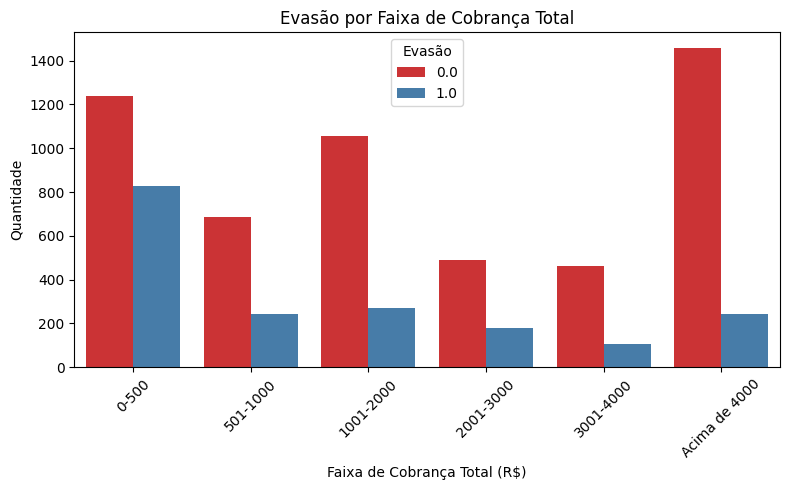

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=tabela_plot,  
    x='Faixa_Cobranca',
    y='Quantidade',
    hue='Evasao',
    palette='Set1'  
)
plt.title('Evasão por Faixa de Cobrança Total')
plt.xlabel('Faixa de Cobrança Total (R$)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend(title='Evasão')
plt.tight_layout()
plt.show()

### Perfil dos Clientes

- Faixa de Cobrança Total: A cobrança total dos clientes foi agrupada em faixas adaptativas conforme o maior valor presente na base, para analisar a evasão em diferentes níveis de gasto.

- Após a conversão dos dados e remoção de valores nulos, foi criada uma tabela de frequência cruzada para contabilizar a evasão em cada faixa de cobrança total.

- Um gráfico de barras (barplot com seaborn) exibiu a distribuição da evasão por faixa de cobrança, facilitando a visualização da tendência de evasão conforme o valor total pago.

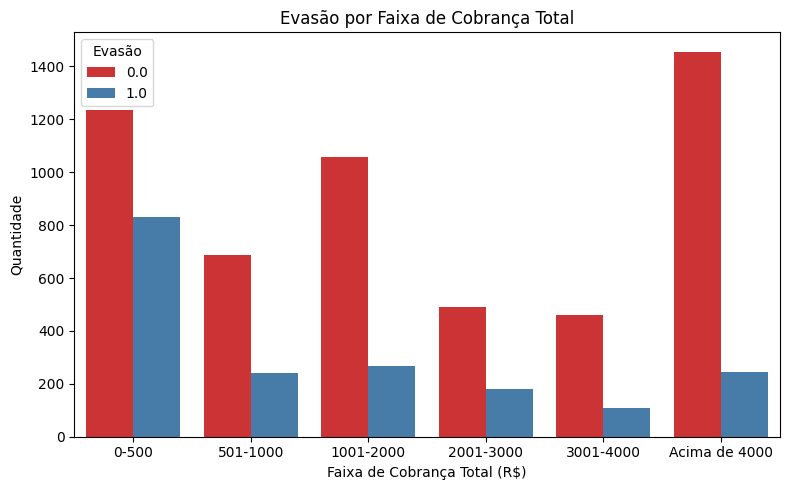

In [119]:
dados['Cobranca_Total'] = pd.to_numeric(
    dados['Cobranca_Total'],
    errors='coerce'
)

dados = dados.dropna(subset=['Cobranca_Total'])

max_valor = dados['Cobranca_Total'].max()

bins = [0, 500, 1000, 2000, 3000, 4000]
if max_valor > 4000:
    bins.append(max_valor + 1)
else:
    bins = [b for b in bins if b <= max_valor + 1]
    if bins[-1] < max_valor:
        bins.append(max_valor + 1)

if len(bins) == 6:
    labels = ['0-500', '501-1000', '1001-2000', '2001-3000', '3001-4000']
else:
    labels = ['0-500', '501-1000', '1001-2000',
              '2001-3000', '3001-4000', f'Acima de 4000']

if len(labels) > len(bins)-1:
    labels = labels[:len(bins)-1]

dados['Faixa_Cobranca'] = pd.cut(
    dados['Cobranca_Total'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

tabela = pd.crosstab(
    dados['Faixa_Cobranca'],
    dados['Evasao']
)

tabela_plot = tabela.reset_index().melt(
    id_vars='Faixa_Cobranca',
    var_name='Evasao',
    value_name='Quantidade'
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=tabela_plot,
    x='Faixa_Cobranca',
    y='Quantidade',
    hue='Evasao',
    palette='Set1'
)
plt.title('Evasão por Faixa de Cobrança Total')
plt.xlabel('Faixa de Cobrança Total (R$)')
plt.ylabel('Quantidade')
plt.legend(title='Evasão')
plt.tight_layout()
plt.show()

### Conclusões e Insights
A análise dos dados da Telecom X revelou padrões importantes sobre o comportamento dos clientes e os fatores associados à evasão (churn). Abaixo estão os principais achados e como eles podem ser aplicados para reduzir a perda de clientes:

#### Principais Achados
Clientes com contrato mensal são os que mais evadem
A maior taxa de evasão está concentrada entre aqueles que possuem contratos mensais. Isso sugere menor comprometimento e maior facilidade para cancelar o serviço.

Usuários de internet via fibra óptica apresentaram maior evasão
Apesar da qualidade superior da fibra óptica, esses clientes demonstraram maior insatisfação ou sensibilidade a preço, o que pode indicar a necessidade de rever a proposta de valor desse serviço.

Evasão presente em ambos os gêneros
Não há diferença significativa entre homens e mulheres em relação à evasão, indicando que estratégias de retenção devem ser amplas e não segmentadas por gênero.

Cobrança mensal elevada pode ser um fator crítico
A criação da métrica “Contas_Diárias” possibilitou avaliar o custo diário percebido pelo cliente. Planos com cobranças mais altas tendem a gerar maior evasão.

#### Como esses dados podem ajudar a reduzir a evasão
Revisar planos mensais: Oferecer benefícios exclusivos ou descontos para quem migra de contrato mensal para anual pode aumentar a fidelização.

Reavaliar os serviços de fibra óptica: Investir em suporte técnico, experiência do cliente e comunicação clara sobre o valor do serviço pode ajudar a reter esse público.

Monitorar sinais de insatisfação: Acompanhamento proativo de clientes com alto valor de cobrança mensal pode evitar cancelamentos.

Programas de fidelidade: Criar incentivos progressivos baseados no tempo de permanência pode reduzir a rotatividade.



## Recomendações

Com base na análise dos dados da Telecom X e nos padrões observados na evasão de clientes, seguem recomendações práticas e direcionadas para reduzir o churn e aumentar a fidelização:

### 1. Incentivar Contratos de Longo Prazo
Problema identificado: Clientes com contratos mensais têm maior probabilidade de cancelamento.

##### Solução recomendada:

- Oferecer descontos, bônus em serviços ou benefícios exclusivos para quem migra para contratos anuais ou bienais.

- Implementar campanhas promocionais para estimular esse tipo de transição.

### 2. Melhorar a Experiência do Cliente com Fibra Óptica
Problema identificado: Clientes com fibra óptica apresentam taxas elevadas de evasão.

##### Solução recomendada:

- Realizar pesquisas de satisfação com esses usuários.

Reforçar o suporte técnico e a comunicação clara sobre os diferenciais do serviço.

Avaliar se o custo está alinhado à percepção de valor.

### 3. Monitoramento Ativo de Risco de Evasão
Problema identificado: Alguns perfis demonstram maior risco de evasão (ex.: cobrança mensal elevada).

##### Solução recomendada:

- Implementar um sistema de monitoramento para identificar sinais de insatisfação (como uso reduzido, chamadas frequentes ao suporte, atraso em pagamentos).

- Ações preventivas como ofertas personalizadas ou contato com o cliente podem reverter a decisão de cancelamento.

### 4. Programa de Fidelidade ou Benefícios Progressivos
Justificativa: Aumentar o valor percebido com o tempo reduz a evasão.

##### Solução recomendada:

- Criar um sistema de recompensas baseado na permanência (como cashback, upgrades de serviço, ou descontos em parceiros).

- Incentivar a continuidade com metas e bonificações escaláveis.

### 5. Educação e Transparência
Justificativa: Informar é uma forma de engajar.

##### Solução recomendada:

- Enviar e-mails ou mensagens explicando as vantagens do contrato de longo prazo, como estabilidade e economia.

- Mostrar comparativos simples entre planos para ajudar o cliente a perceber valor